In [7]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [8]:
dataDir='/home/nxu/Data/mscoco'
dataType='val2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [9]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
0:00:18.916926
creating index...
index created!


In [10]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print 'COCO categories: \n\n', ' '.join(nms)

nms = set([cat['supercategory'] for cat in cats])
print 'COCO supercategories: \n', ' '.join(nms)

COCO categories: 

person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush
COCO supercategories: 
outdoor food indoor appliance sports person animal vehicle furniture accessory electronic kitchen


In [11]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

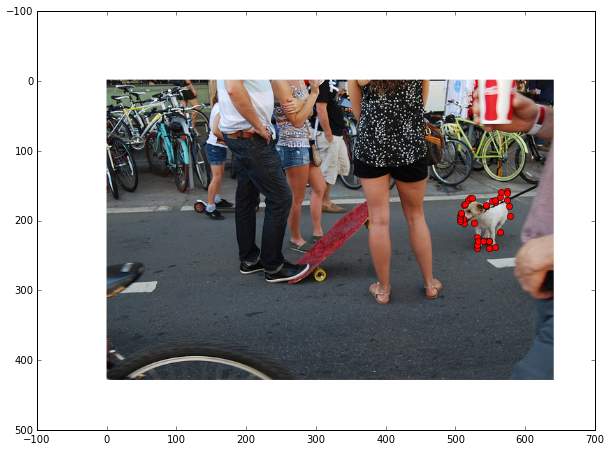

In [43]:
pts = np.array(anns['id'==41]['segmentation'])
pts = pts.reshape((pts.size/2,2))
plt.imshow(I)
plt.plot(pts[:,0],pts[:,1],'ro')
plt.show()

In [49]:
np.random.randint(0,len(imgIds),2)

array([1, 9])

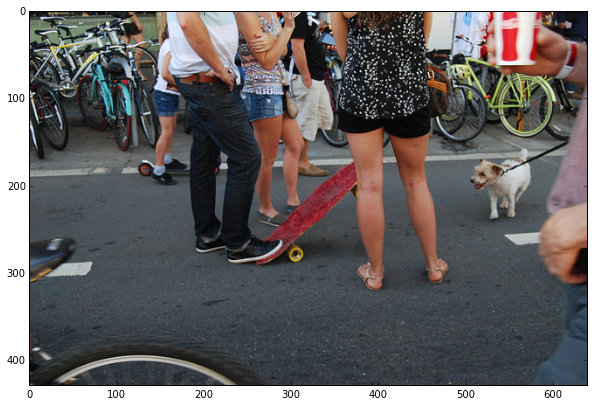

In [12]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.figure()
plt.imshow(I)

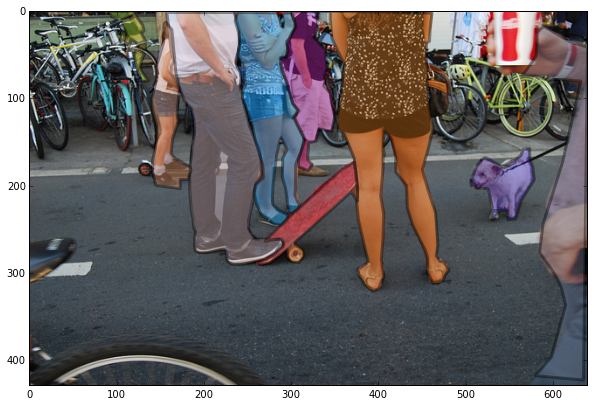

In [17]:
# load and display instance annotations
plt.imshow(I)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
# initialize COCO api for caption annotations
annFile = '%s/annotations/captions_%s.json'%(dataDir,dataType)
caps=COCO(annFile)

loading annotations into memory...
0:00:00.744531
creating index...
index created!


A person riding a skate board in the street holding a flag.
Skate boarder with small sail riding on paved street.
A man rides a skateboard with a sail(?) in the street.
A man in orange pants is on a skateboard that has a flag hanging from it.
A person riding a skateboard on the sidewalk while holding a pole.


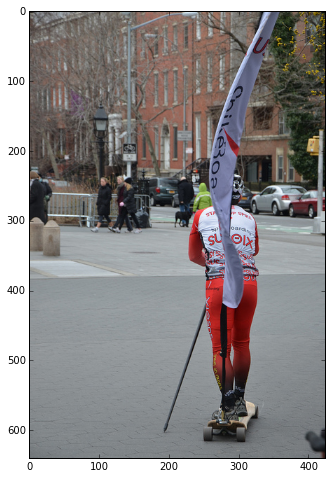

In [9]:
# load and display caption annotations
annIds = caps.getAnnIds(imgIds=img['id']);
anns = caps.loadAnns(annIds)
caps.showAnns(anns)
plt.imshow(I)
plt.show()